### Import Libraries

In [1]:
%load_ext tensorboard
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
print(tf.__version__)

2.3.0


### Import Data 

In [51]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format
online_dataframe = pd.read_excel('OnlineUse.xlsx','OnlineUseData')
online_dataframe = online_dataframe.reindex(np.random.permutation(online_dataframe.index))
online_dataframe.head()

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
4320,4326,0.2,0.5,0.0,0.0,0.2,0.1,0.2,0.3,0.1,...,0.6,0.8,0.9,0.5,0.9,0.6,0.4,0.6,TPP,20714
1198,1204,0.0,0.5,0.0,0.1,0.0,0.1,0.1,0.2,0.2,...,0.8,0.8,0.9,0.6,0.9,0.7,0.5,0.2,TPP,4061
5885,5891,0.1,0.5,0.0,0.1,0.1,0.1,0.2,0.2,0.1,...,0.9,0.8,1.0,0.6,0.9,0.7,0.7,0.4,EMIS,3474
1751,1757,0.1,0.4,0.0,0.1,0.1,0.1,0.2,0.2,0.2,...,0.9,0.8,1.0,0.6,0.8,0.5,0.5,0.3,TPP,6080
3255,3261,0.2,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.1,...,0.7,0.9,0.6,0.4,0.8,0.5,0.7,0.5,VISION,3772


In [3]:
online_dataframe.shape

(6857, 22)

### Pre-Processing 

In [52]:
online_dataframe.isnull().values.any()

False

In [62]:
selected_features = pd.DataFrame(online_dataframe)
selected_features.head()

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
4320,4326,0.2,0.5,0.0,0.0,0.2,0.1,0.2,0.3,0.1,...,0.6,0.8,0.9,0.5,0.9,0.6,0.4,0.6,3,20714
1198,1204,0.0,0.5,0.0,0.1,0.0,0.1,0.1,0.2,0.2,...,0.8,0.8,0.9,0.6,0.9,0.7,0.5,0.2,3,4061
5885,5891,0.1,0.5,0.0,0.1,0.1,0.1,0.2,0.2,0.1,...,0.9,0.8,1.0,0.6,0.9,0.7,0.7,0.4,0,3474
1751,1757,0.1,0.4,0.0,0.1,0.1,0.1,0.2,0.2,0.2,...,0.9,0.8,1.0,0.6,0.8,0.5,0.5,0.3,3,6080
3255,3261,0.2,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.1,...,0.7,0.9,0.6,0.4,0.8,0.5,0.7,0.5,4,3772


In [63]:
#Encode categorical variable
selected_features['vendor'] = online_dataframe['vendor'].astype('category').cat.codes

In [64]:
selected_features

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
4320,4326,0.2,0.5,0.0,0.0,0.2,0.1,0.2,0.3,0.1,...,0.6,0.8,0.9,0.5,0.9,0.6,0.4,0.6,3,20714
1198,1204,0.0,0.5,0.0,0.1,0.0,0.1,0.1,0.2,0.2,...,0.8,0.8,0.9,0.6,0.9,0.7,0.5,0.2,3,4061
5885,5891,0.1,0.5,0.0,0.1,0.1,0.1,0.2,0.2,0.1,...,0.9,0.8,1.0,0.6,0.9,0.7,0.7,0.4,0,3474
1751,1757,0.1,0.4,0.0,0.1,0.1,0.1,0.2,0.2,0.2,...,0.9,0.8,1.0,0.6,0.8,0.5,0.5,0.3,3,6080
3255,3261,0.2,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.1,...,0.7,0.9,0.6,0.4,0.8,0.5,0.7,0.5,4,3772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4777,4783,0.2,0.4,0.0,0.1,0.2,0.2,0.2,0.2,0.1,...,1.0,0.9,0.9,0.6,0.9,0.6,0.6,0.5,0,8531
4825,4831,0.3,0.5,0.0,0.0,0.1,0.1,0.1,0.2,0.3,...,0.9,0.9,0.9,0.6,0.9,0.5,0.8,0.6,0,6901
3860,3866,0.2,0.5,0.0,0.1,0.1,0.1,0.3,0.1,0.2,...,0.9,0.9,0.9,0.5,0.8,0.5,0.6,0.5,3,10759
1795,1801,0.2,0.4,0.0,0.0,0.2,0.1,0.3,0.2,0.1,...,0.2,0.7,0.9,0.6,0.8,0.5,0.0,0.8,3,21590


In [65]:
#Remove rows with missing values
# -97 or -98 is used to indicate missing data
selected_features = selected_features[(selected_features != -97).all(axis=1)]
selected_features = selected_features[(selected_features != -98).all(axis=1)]

In [66]:
# Check rows and columns
selected_features.shape

(6360, 22)

In [67]:
# create a dataframe of all independent variables
training_features = selected_features.drop(columns =['OnlineAppointmentUse', 'ClinicID'])

In [68]:
# create a dataframe of target variables
output_targets = pd.DataFrame(selected_features, columns = ["OnlineAppointmentUse"])

### Train/Validation Split

In [69]:
training_features.head(5000)


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
4320,0.5,0.0,0.0,0.2,0.1,0.2,0.3,0.1,0.1,0.0,0.6,0.8,0.9,0.5,0.9,0.6,0.4,0.6,3,20714
1198,0.5,0.0,0.1,0.0,0.1,0.1,0.2,0.2,0.2,0.1,0.8,0.8,0.9,0.6,0.9,0.7,0.5,0.2,3,4061
5885,0.5,0.0,0.1,0.1,0.1,0.2,0.2,0.1,0.1,0.0,0.9,0.8,1.0,0.6,0.9,0.7,0.7,0.4,0,3474
1751,0.4,0.0,0.1,0.1,0.1,0.2,0.2,0.2,0.1,0.0,0.9,0.8,1.0,0.6,0.8,0.5,0.5,0.3,3,6080
3255,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.1,0.0,0.0,0.7,0.9,0.6,0.4,0.8,0.5,0.7,0.5,4,3772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4735,0.5,0.0,0.0,0.1,0.2,0.2,0.2,0.1,0.1,0.1,0.7,0.8,0.9,0.6,0.9,0.5,0.5,0.4,3,10833
226,0.5,0.0,0.1,0.1,0.2,0.1,0.1,0.3,0.1,0.0,0.6,0.9,1.0,0.7,0.7,0.7,0.5,0.3,3,9338
4144,0.5,0.0,0.2,0.1,0.1,0.2,0.2,0.1,0.1,0.0,0.5,0.9,0.9,0.4,0.9,0.5,0.5,0.5,0,19700
6146,0.5,0.1,0.2,0.1,0.2,0.2,0.1,0.1,0.0,0.1,0.7,0.9,0.7,0.7,0.9,0.7,0.6,0.4,0,18489


In [59]:
# Choose 5000 examples for train.
training_examples = training_features.head(5000)
training_target = output_targets.head(5000)

# Normalize training data
#scaler = StandardScaler().fit(training_examples.values)
#scaledf = scaler.transform(training_examples.values)
#training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)


# Choose 1360 examples for validation.
#validation_examples = training_features.tail(1360)
#validation_target = output_targets.tail(1360)

# Normalize validation data
#scaler = StandardScaler().fit(validation_examples.values)
#scaledf = scaler.transform(validation_examples.values)
#validation_examples = pd.DataFrame(scaledf, index=validation_examples.index, columns=validation_examples.columns)
print("Five rows of training data: ")
training_examples.head(5)

Five rows of training data: 


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
4320,0.5,0.0,0.0,0.2,0.1,0.2,0.3,0.1,0.1,0.0,0.6,0.8,0.9,0.5,0.9,0.6,0.4,0.6,3,20714
1198,0.5,0.0,0.1,0.0,0.1,0.1,0.2,0.2,0.2,0.1,0.8,0.8,0.9,0.6,0.9,0.7,0.5,0.2,3,4061
5885,0.5,0.0,0.1,0.1,0.1,0.2,0.2,0.1,0.1,0.0,0.9,0.8,1.0,0.6,0.9,0.7,0.7,0.4,0,3474
1751,0.4,0.0,0.1,0.1,0.1,0.2,0.2,0.2,0.1,0.0,0.9,0.8,1.0,0.6,0.8,0.5,0.5,0.3,3,6080
3255,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.1,0.0,0.0,0.7,0.9,0.6,0.4,0.8,0.5,0.7,0.5,4,3772


### Check Baseline

In [18]:
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_target.describe())
print("Validation targets summary:")
display.display(validation_target.describe())

print("Check the baseline: ")
print("Mean Absolute Deviation of training target is: ")
display.display(training_target.mad()) 

print("Mean Absolute Deviation of validation target is: ")
display.display(validation_target.mad())

Training examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.5,0.0,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0.7,0.8,0.8,0.5,0.8,0.6,0.5,0.4,1.3,8844.1
std,0.1,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.2,0.1,0.3,0.1,0.1,0.1,0.2,0.2,1.5,5380.1
min,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.0,0.2,0.4,0.3,0.0,0.0,0.0,1272.0
25%,0.5,0.0,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.6,0.7,0.6,0.5,0.8,0.5,0.4,0.3,0.0,5120.8
50%,0.5,0.0,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0.7,0.8,0.9,0.5,0.8,0.6,0.5,0.4,0.0,7793.0
75%,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.1,0.0,0.9,0.9,0.9,0.6,0.9,0.7,0.6,0.5,3.0,11272.5
max,0.8,0.5,0.7,0.6,0.4,0.4,0.3,0.3,0.2,0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,5.0,73488.0


Validation examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0,1360.0
mean,0.5,0.0,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0.7,0.8,0.7,0.5,0.8,0.6,0.5,0.4,1.3,8861.4
std,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.2,0.1,0.3,0.1,0.1,0.1,0.2,0.2,1.5,5415.2
min,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.2,0.3,0.3,0.0,0.0,0.0,1893.0
25%,0.5,0.0,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.0,0.6,0.7,0.6,0.5,0.8,0.5,0.4,0.3,0.0,5032.8
50%,0.5,0.0,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.0,0.7,0.8,0.9,0.5,0.8,0.6,0.5,0.4,0.0,7860.0
75%,0.5,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.1,0.0,0.9,0.9,0.9,0.6,0.9,0.7,0.6,0.5,3.0,11253.5
max,0.7,0.2,0.3,0.7,0.4,0.3,0.3,0.3,0.2,0.1,1.0,1.0,1.0,0.8,1.0,1.0,1.0,0.8,5.0,60717.0


Training targets summary:


,OnlineAppointmentUse
count,5000.0
mean,0.1
std,0.1
min,0.0
25%,0.1
50%,0.1
75%,0.2
max,0.6


Validation targets summary:


,OnlineAppointmentUse
count,1360.0
mean,0.1
std,0.1
min,0.0
25%,0.1
50%,0.1
75%,0.2
max,0.6


Check the baseline: 
Mean Absolute Deviation of training target is: 


OnlineAppointmentUse   0.1
dtype: float64

Mean Absolute Deviation of validation target is: 


OnlineAppointmentUse   0.1
dtype: float64

### Build Model

In [60]:
baseline_model = keras.Sequential([
    keras.layers.Dense(2222, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(704, activation=tf.nn.relu),
    keras.layers.Dense(1)

  ])


baseline_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mse'])
baseline_model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2222)              46662     
_________________________________________________________________
dense_28 (Dense)             (None, 704)               1564992   
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 705       
Total params: 1,612,359
Trainable params: 1,612,359
Non-trainable params: 0
_________________________________________________________________


### Fit Model

In [61]:
EPOCHS = 100
from keras.callbacks import EarlyStopping
#early_stopping_monitor = EarlyStopping(monitor = 'val_loss',patience=3)
b_history = baseline_model.fit(training_examples, training_target, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_target), verbose=1)

Epoch 1/100
157/157 [==============================] - 5s 34ms/step - loss: 1424434.8750 - mse: 1424434.8750 - val_loss: 0.0768 - val_mse: 0.0768
Epoch 2/100
157/157 [==============================] - 5s 30ms/step - loss: 22661.4902 - mse: 22661.4902 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 3/100
157/157 [==============================] - 5s 30ms/step - loss: 2434.3616 - mse: 2434.3616 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 4/100
157/157 [==============================] - 5s 29ms/step - loss: 2.8882 - mse: 2.8882 - val_loss: 0.0282 - val_mse: 0.0282
Epoch 5/100
157/157 [==============================] - 5s 30ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 6/100
157/157 [==============================] - 5s 29ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 7/100
157/157 [==============================] - 5s 30ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 8/100
157/157 [===============

157/157 [==============================] - 5s 34ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0900 - val_mse: 0.0900s: 0.00
Epoch 62/100
157/157 [==============================] - 4s 27ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0893 - val_mse: 0.0893
Epoch 63/100
157/157 [==============================] - 4s 27ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0905 - val_mse: 0.0905
Epoch 64/100
157/157 [==============================] - 4s 26ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0853 - val_mse: 0.0853
Epoch 65/100
157/157 [==============================] - 4s 27ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0983 - val_mse: 0.0983
Epoch 66/100
157/157 [==============================] - 4s 26ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 67/100
157/157 [==============================] - 4s 27ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.1012 - val_mse: 0.1012
Epoch 68/100
157/157 [==============================] - 4s 26

### Validation Error

In [23]:
print("Minimum validation error is: ", min(b_history.history['val_mse']))
print("Maximum validation error is: ", max(b_history.history['val_mse']))

Minimum validation error is:  0.049241211265325546
Maximum validation error is:  11182.6201171875


### Predictions

In [24]:
valpreds = baseline_model.predict_on_batch(validation_examples.iloc[1:10])
print(valpreds)

[[5.7052975]
 [0.9340306]
 [6.576742 ]
 [6.894644 ]
 [1.3122044]
 [3.242262 ]
 [1.4996319]
 [4.246565 ]
 [4.404661 ]]


In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_target.iloc[1:10])

      OnlineAppointmentUse
4230                   0.1
5472                   0.0
4070                   0.1
5471                   0.1
4535                   0.1
579                    0.3
6745                   0.1
5385                   0.1
2850                   0.1


### Plot Results 

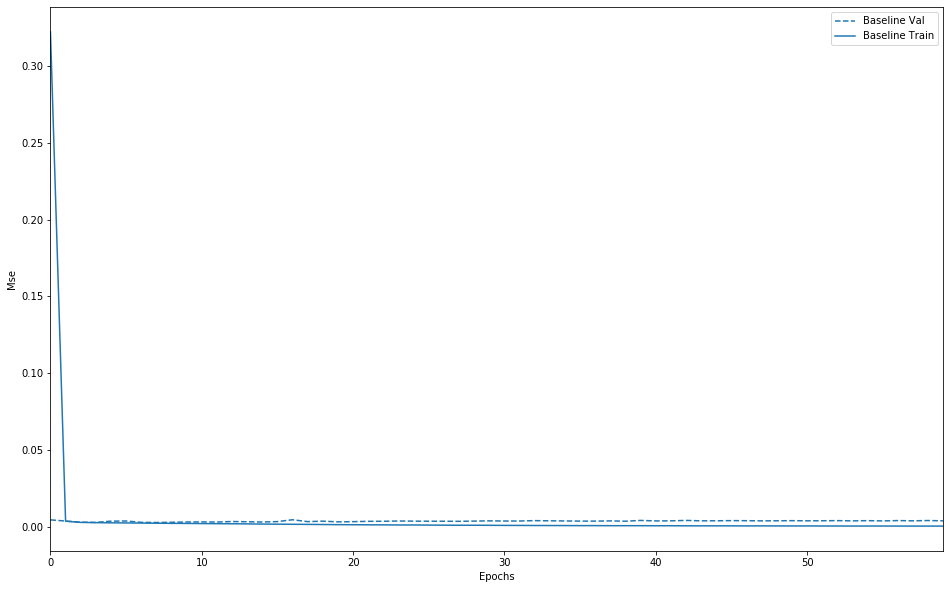

In [49]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mse'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  

plot_history([('baseline', b_history)])

### Inference:

The output type of this model is continuous, so the activation function used here is linear, loss function as 'mse', optimizer as 'rmsprop' and metric as 'mse'. The baseline is mean absolute deviation of target variable of training data. 
The performance of this model is exceeding the performance of baseline. 
The baseline is 0.1 (Mean Absolute Deviation of target training variable). 
The minimum and maximum validation error is 0.002 and 0.006 respectively.